# Population in the US by state

## Table of contents
1. Setup
2. Functions
3. Input and data cleanup
4. Combine columns
5. Export to CSV
6. Graphing
    - (line graph) comparison of population between two states
    - (line graph) linear regression
    - (bar chart) Population density by year

# 1. Setup

In [1]:
#import required packages
#%pip install sklearn ipywidgets numpy pandas matplotlib requests ipywidgets IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#!pip install version_information
%matplotlib notebook

##### code from stack overflow
##### https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event
w = widgets.Dropdown(
    options=['Addition', 'Multiplication', 'Subtraction', 'Division'],
    value='Addition',
    description='Task:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

In [2]:
#load version information
%load_ext version_information

In [3]:
#Version for Pandas and numpy
#Pandas (1.2.4), numpy (1.20.1), matplotlib (3.3.4), requests (2.25.1), json (2.0.9) were used for this assignment
%version_information pandas, numpy, matplotlib, requests, json, ipywidgets, IPython, sklearn, scipy

Software,Version
Python,3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython,7.22.0
OS,Windows 10 10.0.19041 SP0
pandas,1.2.4
numpy,1.20.1
matplotlib,3.3.4
requests,2.25.1
json,2.0.9
ipywidgets,7.6.3
IPython,7.22.0


# 2. Functions

In [4]:
#list of functions

#function to get API data
def API_ping (API):
    api_response = requests.get(API)
    if api_response:
        print('request successful')
    else:
        print('request not successful')
        print(api_response.status_code)

#get charcteristics of a dataframe
def df_char(df):
    print('Shape of dataframe:', df.shape)
    print('\nColumn names:',df.columns, '\n')
    print( df.info())

#clean column names
def clean_columns(df):
    df.columns = df.columns.str.strip(" ")
    df.columns = df.columns.str.strip("_")
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('-', '_')
    #df.columns = df.columns.str.replace('113_cause_name', 'cause_name_113')
    print(df.columns)


#graph two data sets
def graph_me(df1, df2, PTitle, Label1, Label2):
    fig1 = plt.figure(1)
    plt.clf()
    plt.plot(df1.year,df1.population, label= Label1)
    plt.plot(df2.year,df2.population,label= Label2)
    plt.title(PTitle)
    plt.ylabel(df1.columns[1])
    plt.xlabel(df1.columns[0])
    #plt.xticks(ticks=[2000,2005,2010,2015])
    plt.legend()
    plt.show()
    
#graph two data sets for figure 3
def graph_me2(df1, df2, PTitle, Label1, Label2):
    df1 = df1.diff()
    df2 = df2.diff()
    fig3 = plt.figure(3)
    plt.clf()
    plt.plot(df1.year,df1.population, label= Label1)
    plt.plot(df2.year,df2.population,label= Label2)
    plt.title(PTitle)
    plt.ylabel(df1.columns[1])
    plt.xlabel(df1.columns[0])
    #plt.xticks(ticks=[2000,2005,2010,2015])
    plt.legend()
    plt.show()

#predict population based on area and year
#Most of the below is adapted from 
#https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9
def linear_regression(df):
    x = df[['area', 'year']]
    y = df['population']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)
    regression = LinearRegression()
    regression.fit(train_x, train_y)
    print('\n', "regression coefficient",regression.coef_)
    print('\n', "regression intercept",regression.intercept_)
    regression_confidence = regression.score(test_x, test_y)
    print('\n', "linear regression confidence: ", regression_confidence)
    predicted = regression.predict(test_x)
    dflr=pd.DataFrame({'Actual_Population':test_y, 'Predicted_Population':predicted})
    print(dflr.head(10))
    print(dflr.tail(10))
    print('\n', 'Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
    print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))
    x2 = dflr.Actual_Population.mean()
    y2 = dflr.Predicted_Population.mean()
    Accuracy1 = x2/y2*100
    print('\n', "The accuracy of the model is " , Accuracy1)
    #fig3 = plt.figure(3)
    #plt.scatter(dflr.Actual_Population, dflr.Predicted_Population,  color='Darkblue')
    #plt.xlabel("Actual Population")
    #plt.ylabel("Predicted Population")
    #plt.show()
    slope, intercept, r_value, p_value, std_err = linregress(dflr)
    #fig2 = plt.figure(2)
    #plt.plot(dflr.Actual_Population, color='black',label='Acutal')
    #plt.plot(dflr.Predicted_Population, color='lightblue',label='Predicted')
    #plt.plot((intercept + slope*dflr.Predicted_Population), 'r', label='fitted line')
    #plt.title("Population predicted")
    #plt.legend();
    #plt.show()
    prediction_population = []
    prediction_year = []
    for i in range(50):
        #print(i+1990)
        temp_pop = regression.coef_[1]*(i+1990) + regression.intercept_
        prediction_population.append(temp_pop)
        prediction_year.append(i+1990)
        #print(prediction_population)
        #print(prediction_year)
    df_Prediction = pd.DataFrame(prediction_population,prediction_year)
    #print(df_Prediction)
    fig2 = plt.figure(2)
    plt.plot(df_Prediction, color = 'black',label='predicted')
    plt.plot(df.year,df.population, color = 'blue', label = 'actual')
    plt.title("Population predicted")
    plt.legend()
    plt.xlabel('year')
    plt.ylabel('population')
    plt.show()
    
    return dflr

# 3. Input and clean data

In [5]:
#pathway to document on GitHub
State_Ab = "https://raw.githubusercontent.com/boward10/Python-Data_Data_Wrangling_Assignment/main/abbrevs.csv"
State_Pop = "https://raw.githubusercontent.com/boward10/Python-Data_Data_Wrangling_Assignment/main/population.csv"
State_Area = "https://raw.githubusercontent.com/boward10/Python-Data_Data_Wrangling_Assignment/main/areas.csv"
print(State_Ab)
print(State_Pop)
print(State_Area)

https://raw.githubusercontent.com/boward10/Python-Data_Data_Wrangling_Assignment/main/abbrevs.csv
https://raw.githubusercontent.com/boward10/Python-Data_Data_Wrangling_Assignment/main/population.csv
https://raw.githubusercontent.com/boward10/Python-Data_Data_Wrangling_Assignment/main/areas.csv


In [6]:
#Look at data imported
Ab = pd.read_csv(State_Ab)
Pop = pd.read_csv(State_Pop)
Area = pd.read_csv(State_Area)
print('Abbreviations\n',Ab.head())
print('\nPopulation\n',Pop.head())
print('\nArea\n' ,Area.head())

Abbreviations
         state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Population
   state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

Area
         state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


### Abbreviations

In [7]:
#look at 
print('Ab')
df_char(Ab)

Ab
Shape of dataframe: (51, 2)

Column names: Index(['state', 'abbreviation'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         51 non-null     object
 1   abbreviation  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes
None


### Population

In [8]:
#look at
print('Pop')
df_char(Pop)

Pop
Shape of dataframe: (2544, 4)

Column names: Index(['state/region', 'ages', 'year', 'population'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state/region  2544 non-null   object 
 1   ages          2544 non-null   object 
 2   year          2544 non-null   int64  
 3   population    2524 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB
None


### Area

In [9]:
#look at
print('Area')
df_char(Area)

Area
Shape of dataframe: (52, 2)

Column names: Index(['state', 'area (sq. mi)'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          52 non-null     object
 1   area (sq. mi)  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes
None


# 4. Combine columns

In [10]:
#print(Area.columns)
Pop.columns = Pop.columns.str.replace('/region',' ')
print(Pop.columns)
Pop.columns = Pop.columns.str.replace('state', 'abbreviation')
print(Pop.columns,'\n')

#Clean data
clean_columns(Pop)
clean_columns(Ab)
clean_columns(Area)
Area = Area.rename(columns={'area_(sq._mi)':'area'})
print('\n',Area.columns)

Index(['state ', 'ages', 'year', 'population'], dtype='object')
Index(['abbreviation ', 'ages', 'year', 'population'], dtype='object') 

Index(['abbreviation', 'ages', 'year', 'population'], dtype='object')
Index(['state', 'abbreviation'], dtype='object')
Index(['state', 'area_(sq._mi)'], dtype='object')

 Index(['state', 'area'], dtype='object')


In [11]:
#first merge: abbreviation and Area
df = pd.merge(Ab,Area, how = 'outer')
df_char(df)
df.head()

Shape of dataframe: (52, 3)

Column names: Index(['state', 'abbreviation', 'area'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         52 non-null     object
 1   abbreviation  51 non-null     object
 2   area          52 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,state,abbreviation,area
0,Alabama,AL,52423
1,Alaska,AK,656425
2,Arizona,AZ,114006
3,Arkansas,AR,53182
4,California,CA,163707


In [12]:
#check names and abreviations
#note Puerto Rico has no abbreviation
print(df.state.unique())
print(df.abbreviation.unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'Puerto Rico']
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC'
 'ND' 'OH' 'OK' 'OR' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' nan]


In [13]:
#second merge: abbreviation and Pop
print(Pop.head())
print('/n',Ab.head(),'/n')
df2 = pd.merge(Pop,Ab, how= 'outer')
df_char(df2)

  abbreviation     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
/n         state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA /n
Shape of dataframe: (2544, 5)

Column names: Index(['abbreviation', 'ages', 'year', 'population', 'state'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2543
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abbreviation  2544 non-null   object 
 1   ages          2544 non-null   object 
 2   year          2544 non-null   int64  
 3   population    2524 non-null   float64
 4   state         2448 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory 

In [14]:
#merge all
df3 = pd.merge(Pop, df)
clean_columns(df3)
df_char(df3)
df3['population_density']= df3.population / df3.area
df3 = df3[df3.ages=='total']
df3

Index(['abbreviation', 'ages', 'year', 'population', 'state', 'area'], dtype='object')
Shape of dataframe: (2448, 6)

Column names: Index(['abbreviation', 'ages', 'year', 'population', 'state', 'area'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 0 to 2447
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abbreviation  2448 non-null   object 
 1   ages          2448 non-null   object 
 2   year          2448 non-null   int64  
 3   population    2448 non-null   float64
 4   state         2448 non-null   object 
 5   area          2448 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 133.9+ KB
None


,abbreviation,ages,year,population,state,area,population_density
1,AL,total,2012,4817528.0,Alabama,52423,91.897221
3,AL,total,2010,4785570.0,Alabama,52423,91.287603
5,AL,total,2011,4801627.0,Alabama,52423,91.593900
6,AL,total,2009,4757938.0,Alabama,52423,90.760506
9,AL,total,2013,4833722.0,Alabama,52423,92.206131
...,...,...,...,...,...,...,...
2439,WY,total,1994,480283.0,Wyoming,97818,4.909965
2441,WY,total,1992,466251.0,Wyoming,97818,4.766515
2442,WY,total,1993,473081.0,Wyoming,97818,4.836339
2444,WY,total,1991,459260.0,Wyoming,97818,4.695046


In [15]:
#display table of combined table
df3.style

,abbreviation,ages,year,population,state,area,population_density
1,AL,total,2012,4817528.000000,Alabama,52423,91.897221
3,AL,total,2010,4785570.000000,Alabama,52423,91.287603
5,AL,total,2011,4801627.000000,Alabama,52423,91.593900
6,AL,total,2009,4757938.000000,Alabama,52423,90.760506
9,AL,total,2013,4833722.000000,Alabama,52423,92.206131
10,AL,total,2007,4672840.000000,Alabama,52423,89.137211
12,AL,total,2008,4718206.000000,Alabama,52423,90.002594
14,AL,total,2005,4569805.000000,Alabama,52423,87.171757
16,AL,total,2006,4628981.000000,Alabama,52423,88.300574
18,AL,total,2004,4530729.000000,Alabama,52423,86.426359


# 5. Export to CSV

In [16]:
#export csv
df3.to_csv('Datawrangling.csv')

# 6. Graphing:
- comparison of two states

- linear regression

- population density by year

In [17]:
#get names of states for widgets later
states = df3.state.unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
#prepare data for graphing
df4 = df3[['year','population','state']]
df4 = df4.sort_values('year')
df4

,year,population,state
2447,1990,453690.0,Wyoming
1393,1990,1112384.0,New Hampshire
1391,1990,1220695.0,Nevada
2255,1990,6216884.0,Virginia
2257,1990,4903043.0,Washington
...,...,...,...
1640,2013,723393.0,North Dakota
375,2013,925749.0,Delaware
1254,2013,1015165.0,Montana
1049,2013,6692824.0,Massachusetts


# create a graph using drop downs to display a comparison of two states

In [19]:
#code from stack overflow
#https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event
w1 = widgets.Dropdown(
    options=states,
    value='Alabama',
    description='State #1:',
)
w2 = widgets.Dropdown(
    options=states,
    value='Alabama',
    description='State #2:',
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        Title = 'Comparison of '+ w1.value +' and ' + w2.value
        graph_me(df4.loc[df4.state==w1.value][['year','population']],df4.loc[df4.state==w2.value][['year','population']],Title,w1.value,w2.value)
        #print('state 1 is ',w1.value, ' and state 2 is ',w2.value)
w1.observe(on_change)
w2.observe(on_change)
display(w1)
display(w2)

#graph_me()


Dropdown(description='State #1:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado…

Dropdown(description='State #2:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado…

# linear regression


 regression coefficient [     0.        165377.2037594]

 regression intercept -322591501.3669174

 linear regression confidence:  -3.4156191528557205
            Actual_Population  Predicted_Population
index_year                                         
2010                9713248.0          9.816678e+06
2011                9810181.0          9.982055e+06
2012                9915646.0          1.014743e+07
2013                9992167.0          1.031281e+07
            Actual_Population  Predicted_Population
index_year                                         
2010                9713248.0          9.816678e+06
2011                9810181.0          9.982055e+06
2012                9915646.0          1.014743e+07
2013                9992167.0          1.031281e+07

 Mean Absolute Error (MAE): 206933.49511280656
Mean Squared Error (MSE) : 49193860840.80376
Root Mean Squared Error (RMSE): 221796.89096288919

 The accuracy of the model is  97.94397656598828


<IPython.core.display.Javascript object>


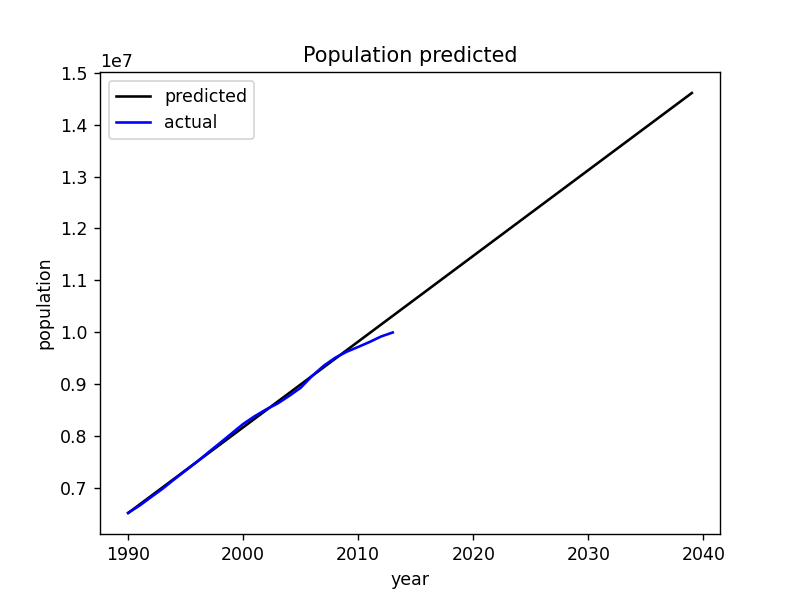

,Actual_Population,Predicted_Population
index_year,,
2010,9713248.0,9.816678e+06
2011,9810181.0,9.982055e+06
2012,9915646.0,1.014743e+07
2013,9992167.0,1.031281e+07


In [20]:
#linear regression to predict population changes by year
df7 = df3[df3.state == 'Georgia']
df8 = df7[df7.ages=='total'].sort_values('year')
df8['index_year'] = df8.year
df8 = df8.set_index('index_year')
df9 = linear_regression(df8)
df9

# change in two states plus us

In [21]:
US_pop = []
US_year = []
for i in range(24):
    #print(i+1990)
    US_pop.append(df4[df4.year==i+1990]['population'].sum())
    US_year.append(i+1990)
    #print(i+1990,US_pop)
df_USA_pop = pd.DataFrame(US_pop,US_year)
df_USA_pop

,0
1990,249622814.0
1991,252980942.0
1992,256514231.0
1993,259918595.0
1994,263125826.0
1995,266278403.0
1996,269394291.0
1997,272646932.0
1998,275854116.0
1999,279040181.0


In [22]:
#code from stack overflow
#https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event
w3 = widgets.Dropdown(
    options=states,
    value='Alabama',
    description='State #1:',
)
w4 = widgets.Dropdown(
    options=states,
    value='Alabama',
    description='State #2:',
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        Title = 'Comparison of '+ w3.value +' and ' + w4.value
        dfa = df4.loc[df4.state==w3.value][['population','year']].set_index('year')
        dfb = df4.loc[df4.state==w4.value][['population', 'year']].set_index('year')
        #dfc =
        
        #graph two data sets for figure 3
        dfa = dfa.diff()
        #print(dfa)
        dfb = dfb.diff()
        #print(dfb)
        dfc = df_USA_pop.diff()
        #print(dfc)
        fig3 = plt.figure(3)
        plt. clf()
        plt.plot(dfa, label = w3.value)
        plt.plot(dfb, label = w4.value)
        plt.plot(dfc, label = 'USA')
        plt.ylabel('Population')
        plt.xlabel('Year')
        plt.title('Population change comparison of two states with USA')
        #plt.xticks(ticks=[2000,2005,2010,2015])
        plt.legend()
        plt.show()
        print('state 1 is ',w3.value, ' and state 2 is ',w4.value)
w3.observe(on_change)
w4.observe(on_change)
display(w3)
display(w4)

#graph_me()

Dropdown(description='State #1:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado…

Dropdown(description='State #2:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado…

# Create a bar chart for year based on slide bar

In [23]:
#Bar graph to show population density by state
w5 = widgets.IntSlider(
    value=7,
    min=1990,
    max=2013,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(w5)

def on_change(change):
    fig4 = plt.figure(1)
    if change['type'] == 'change' and change['name'] == 'value':
        Title = w5.value
        graph_year= w5.value
        df10 = df3[df3.year==graph_year].sort_values('state')
        df10 = df10[['population_density','abbreviation']]
        df10.plot(kind='bar', x = 'abbreviation', y='population_density', title = graph_year,color = ['red','Green','blue'])

w5.observe(on_change)

IntSlider(value=1990, continuous_update=False, description='Test:', max=2013, min=1990)